# Supervised UMAP to differentiate DN vs Vasculitis vs controls
Now we have three labels for classification: DN (diabetic nephropathy), Vasculitis, and healthy controls
### Input files
* `dn_va_control_test_train.csv` peptidomic data of $900$ DN, vasculitis patients and healthy controls
### pipeline
* `umap_pipeline.py` for supervised UMAP
* `helper.py` for scatter plot of embedded data
### Steps
1. Peptide intensities (X) and diagnosis (Y) are fitted to the pipeline 
2. A frequency threshold of $30\%$ was applied to Peptide
3. The data were splitted into train ($70\%$) and test ($50\%$)
4. A SVM was trained to select the best UMAP parameters for maximum separation. The default cross validation is 5.
5. The Trained pipeline was applied to test data
6. The embedded test data were plotted in 2-dimension
### Conclusion
The accuracy of the test data is 0.873. There are more missclassification between DN and vasculitis, than between others.
### Next step
Enroll more patients with IgAN

In [44]:
import pandas as pd
import numpy as np 

from set_path import *
import umap_pipeline

In [8]:
df1=pd.read_csv(f2+'dn_va_control_test_train.csv',index_col=0)
X=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [132]:
df1.groupby('Krankheit').count()

,x99900001,x99900002,x99900005,x99900015,x99900017,x99900028,x99900034,x99900081,x99900082,x99900084,...,x99920718,x99920740,x99920743,x99920748,x99920805,x99920946,x99921328,x99921391,x99921470,x99921471
Krankheit,,,,,,,,,,,,,,,,,,,,,
DN,437,437,437,437,437,437,437,437,437,437,...,437,437,437,437,437,437,437,437,437,437
Vasc,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
control,369,369,369,369,369,369,369,369,369,369,...,369,369,369,369,369,369,369,369,369,369


In [14]:
pline=umap_pipeline.pline(freq_thres=0.3)
pline.load_data(X,y)
pline.logX()
pline.train_test_split(train_size=0.7)

In [15]:
pline.pipeline_fit()

1194
  (127, 1)	0.27316847
  (127, 7)	0.3002893
  (127, 100)	0.29783675
  (127, 116)	0.26712373
  (127, 138)	0.26919463
  (127, 153)	0.34036565
  (127, 166)	0.28549004
  (127, 237)	0.26940137
  (127, 418)	0.26158568
  (127, 434)	0.26499307
  (127, 451)	0.26794603
  (127, 452)	0.29108277
  (127, 460)	0.31906226
  (127, 496)	0.26622704
  (127, 506)	0.273485
inside function
   (0, 23)	0.27516112
  (0, 30)	0.28464332
  (0, 195)	0.30896443
  (0, 198)	0.29687583
  (0, 204)	0.27479178
  (0, 236)	0.31737658
  (0, 238)	0.27169618
  (0, 274)	0.29273462
  (0, 286)	0.27195567
  (0, 289)	0.27825406
  (0, 300)	0.26510394
  (0, 358)	0.2669886
  (0, 377)	0.26821578
  (0, 398)	0.27473024
  (0, 438)	0.27676758
  (1, 24)	0.27242622
  (1, 26)	0.29134846
  (1, 78)	0.28641292
  (1, 111)	0.27983153
  (1, 134)	0.2820821
  (1, 135)	0.28398702
  (1, 163)	0.27656066
  (1, 174)	0.2786172
  (1, 227)	0.2824702
  (1, 254)	0.27045473
  :	:
  (126, 131)	0.27347317
  (126, 171)	0.26578456
  (126, 222)	0.26770216
  (126

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('umap',
                                        UMAP(dens_frac=0.0, dens_lambda=0.0,
                                             random_state=456)),
                                       ('svc', SVC())]),
             param_grid={'umap__min_dist': [0.001, 0.01, 0.1, 0.5],
                         'umap__n_neighbors': [5, 15, 25, 35, 45]})

In [16]:
pline.get_accuracy()

Accuracy on the train set with UMAP transformation: 0.981
inside function
   (0, 115)	0.5796523
  (0, 272)	0.57927805
  (0, 402)	0.5811298
  (0, 588)	0.5818646
  (0, 599)	0.5910425
  (1, 86)	0.59993356
  (1, 160)	0.57983404
  (1, 204)	0.57804024
  (1, 289)	0.58234155
  (1, 604)	0.58171725
  (2, 83)	0.57610106
  (2, 356)	0.5794413
  (2, 433)	0.5909509
  (2, 434)	0.5926311
  (2, 543)	0.57543993
  (3, 63)	0.57461107
  (3, 244)	0.5839358
  (3, 283)	0.57633436
  (3, 505)	0.5870408
  (3, 543)	0.59119236
  (4, 30)	0.57269466
  (4, 113)	0.5916446
  (4, 290)	0.59656507
  (4, 413)	0.57029605
  (4, 504)	0.5872855
  :	:
  (270, 134)	0.5856897
  (270, 254)	0.579367
  (270, 258)	0.5754328
  (270, 440)	0.581431
  (270, 520)	0.58590144
  (271, 3)	0.579413
  (271, 145)	0.57596457
  (271, 500)	0.589715
  (271, 551)	0.5860578
  (271, 638)	0.58049846
  (272, 86)	0.5791335
  (272, 87)	0.6008025
  (272, 148)	0.5812268
  (272, 498)	0.57899636
  (272, 509)	0.58256304
  (273, 209)	0.5885496
  (273, 442)	0.5928

[[301   0   5]
 [  3  72   2]
 [  1   1 256]]


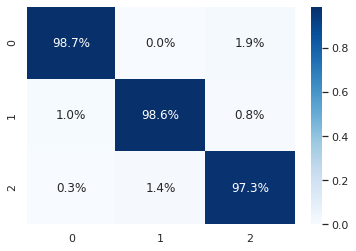

In [60]:
pline.get_confusion_matrix(on='train')

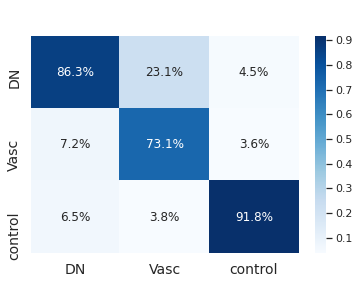

In [137]:
pline.get_confusion_matrix(on='test')


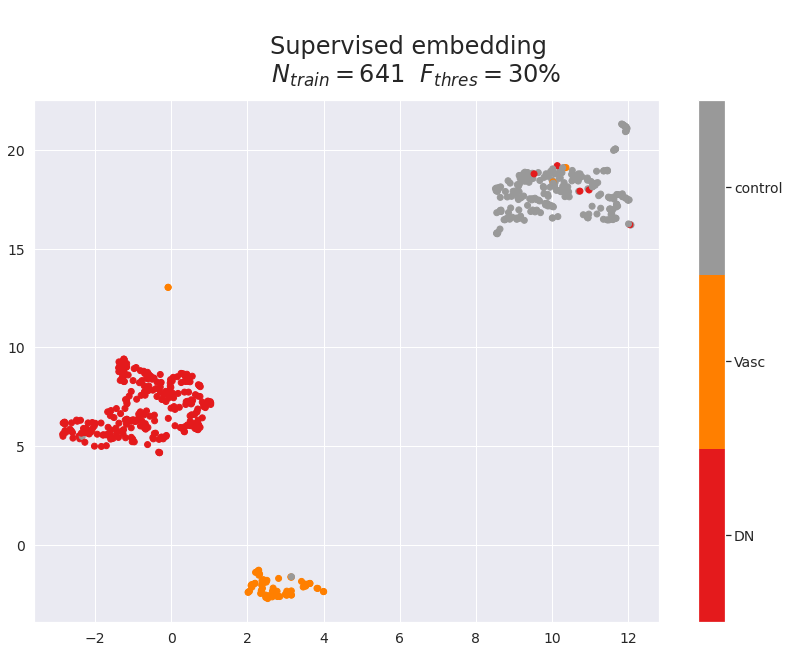

In [131]:
pline.get_plot(on='train',legend='bar',figout=f3+'supervised_dn_va_f30_train.tiff')

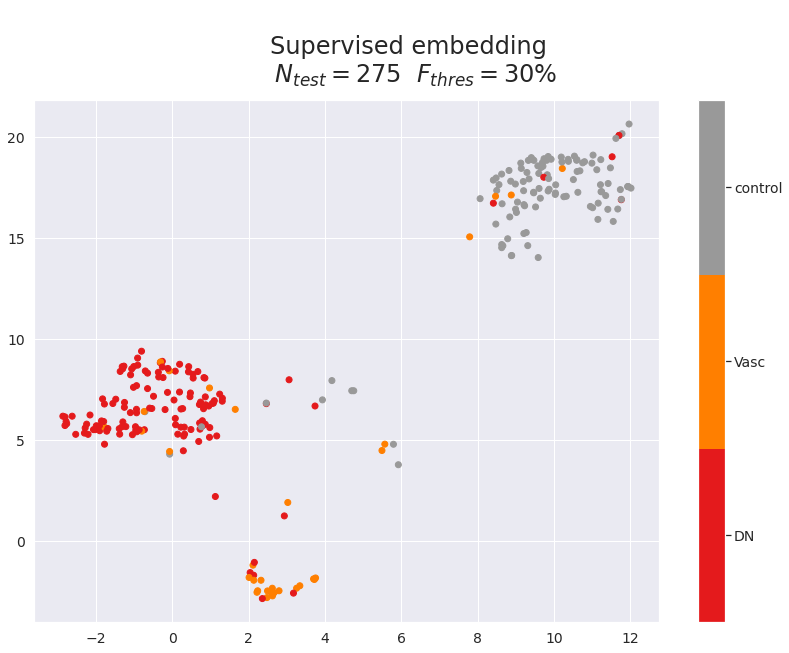

In [136]:
pline.get_plot(on='test',legend='bar',figout=f3+'supervised_dn_va_f30_test.tiff')